<a href="https://colab.research.google.com/github/sam-morales/semantic-segmentation/blob/main/semantic-segment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Segmentation


Computer vision is a rapidly growing field with new advances occurring daily. One of the coolest abilities of computer vision is being able to detect individual objects in an image or video.

Images are simply made up of pixels which can be "segmented" into objects by a machine learning model. This model learns the classes of the desired classifications and then is able to find them in the image.

Semantic Segmentation refers to classifying objects with the same pixel values inside the same colourmaps. This differs from instance segmentation where different instances of the same object are given differing colourmaps

# Usage

The setup for using image segmentation is simple using OpenCV and Pixellib on Python. Simply import the necessary dependencies:

In [2]:
while(True):
  try:
    import pixellib
    break
  except ModuleNotFoundError:
    !pip install pixellib

while(True):
  try:
    from pydrive.auth import GoogleAuth
    from pydrive.drive import GoogleDrive
    from google.colab import auth
    from oauth2client.client import GoogleCredentials
    break
  except ModuleNotFoundError:
    !pip install -U -q PyDrive  

import numpy as np
import os
import time
from pixellib.semantic import semantic_segmentation
from __future__ import print_function
from ipywidgets import interact, interactive
from IPython.display import Image
from google.colab import drive
from tqdm.notebook import tqdm
from matplotlib import pyplot as plt
import ipywidgets as widgets
img = 'none.jpg'

This notebook comes prepared with some datasets and models already! So lets go ahead and load those:

In [4]:
# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

def retrieve_files(destination_dir, g_ID):
  # choose a local (colab) directory to store the data.
  local_download_path = os.path.expanduser('/content/' + destination_dir)
  try:
    os.makedirs(local_download_path)
  except: pass

  # 2. Auto-iterate using the query syntax
  #    https://developers.google.com/drive/v2/web/search-parameters
  file_list = drive.ListFile(
      {'q': f"'{g_ID}' in parents"}).GetList()

  for f in tqdm(file_list):
    # 3. Create & download by id.
    #print('Title: %s, ID: %s' % (f['title'], f['id']))
    fname = os.path.join(local_download_path, f['title'])
    #print('Downloading to {}'.format(fname))
    f_ = drive.CreateFile({'id': f['id']})
    f_.GetContentFile(fname)

print("Retrieving image sets:")
retrieve_files('images', '1RBAX-oqxSUb_j_EB4X7SCcJjzZJwJ6sm')
print("Retrieving model:")
retrieve_files('models', '1cRaafU1x2i3wh9xiubAmEQCJBSzurlBU')

Retrieving image sets:



Retrieving model:


Next we select the image we'd like to pass to to the model:

In [7]:
def show_image_options(file=os.listdir("/content/images/")):
  fullpath = os.path.join("/content/images/", file)
  print(fullpath)
  display(Image(fullpath))
  return file

w = interactive(show_image_options)
display(w)

interactive(children=(Dropdown(description='file', options=('car.jpg', 'puppy.jpg', 'cat.jpg'), value='car.jpg…

Now we can initialize the model using Pixellib:

In [8]:
segment_image = semantic_segmentation()
try:
  segment_image.load_pascalvoc_model("/content/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5")
except:
  print("Error occurred while loading model! Is it in /content/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5")

Now generate our segmented image: 

(**PS**: To check out the other images, just load the image above and run this cell!)

Inference Time: 9.85 seconds


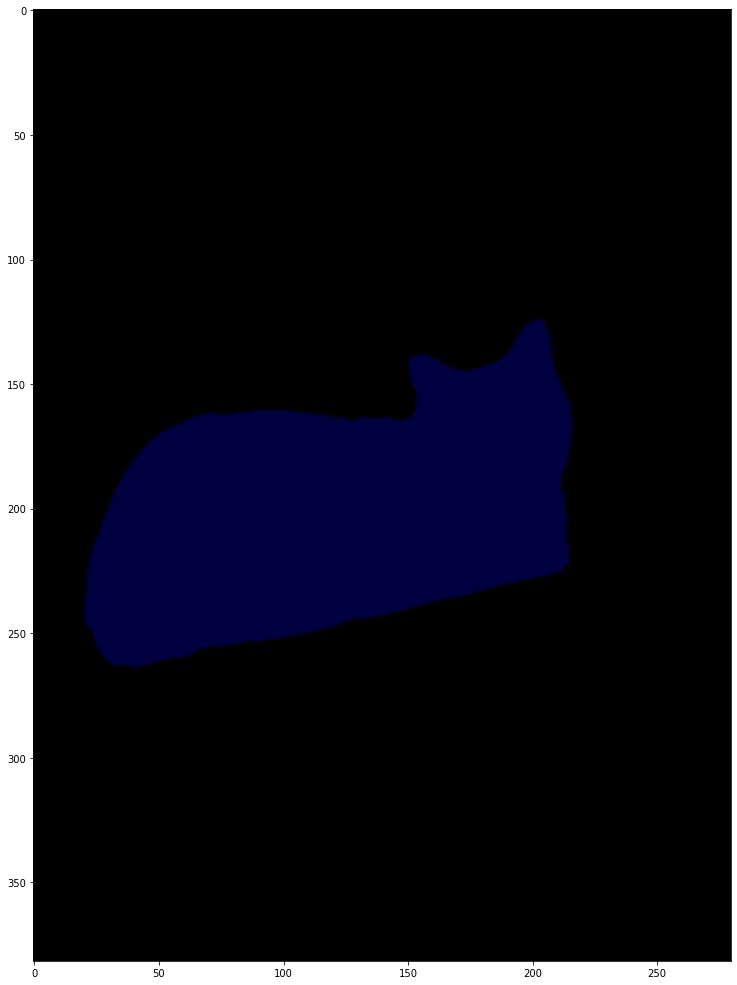

In [9]:
start = time.time()
segmap, segoverlay = segment_image.segmentAsPascalvoc("/content/images/"+w.result)
end = time.time()
print(f"Inference Time: {end-start:.2f} seconds")
plt.rcParams["figure.figsize"] = (12.5,25)
plt.imshow(segoverlay)